In [57]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

df = pd.read_csv("IOT-temp dataset task 2.csv")
print (df.head())

                                    id  room_id/id        noted_date  temp  \
0  __export__.temp_log_196134_bd201015  Room Admin  08-12-2018 09:30  29.0   
1  __export__.temp_log_196131_7bca51bc  Room Admin  08-12-2018 09:30  29.0   
2  __export__.temp_log_196127_522915e3  Room Admin  08-12-2018 09:29  41.0   
3  __export__.temp_log_196128_be0919cf  Room Admin  08-12-2018 09:29  41.0   
4  __export__.temp_log_196126_d30b72fb  Room Admin  08-12-2018 09:29  31.0   

  out/in  
0     In  
1     In  
2    Out  
3    Out  
4     In  


In [58]:
from datetime import datetime
custom_date_parser = lambda x: datetime.strptime(x, "%d-%m-%Y %H:%M")
df = pd.read_csv('IOT-temp dataset task 2.csv',
                 parse_dates=['noted_date'],
                date_parser=custom_date_parser)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          97606 non-null  object        
 1   room_id/id  97606 non-null  object        
 2   noted_date  97606 non-null  datetime64[ns]
 3   temp        97592 non-null  float64       
 4   out/in      97606 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 3.7+ MB


In [6]:
df

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,2018-12-08 09:30:00,29.0,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,2018-12-08 09:30:00,29.0,In
2,__export__.temp_log_196127_522915e3,Room Admin,2018-12-08 09:29:00,41.0,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,2018-12-08 09:29:00,41.0,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,2018-12-08 09:29:00,31.0,In
...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,2018-07-28 07:07:00,31.0,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,2018-07-28 07:07:00,31.0,In
97603,__export__.temp_log_100386_84093a68,Room Admin,2018-07-28 07:06:00,31.0,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,2018-07-28 07:06:00,31.0,In


In [59]:
df.drop(['id','room_id/id'],axis=1,inplace=True)
df

,noted_date,temp,out/in
0,2018-12-08 09:30:00,29.0,In
1,2018-12-08 09:30:00,29.0,In
2,2018-12-08 09:29:00,41.0,Out
3,2018-12-08 09:29:00,41.0,Out
4,2018-12-08 09:29:00,31.0,In
...,...,...,...
97601,2018-07-28 07:07:00,31.0,In
97602,2018-07-28 07:07:00,31.0,In
97603,2018-07-28 07:06:00,31.0,In
97604,2018-07-28 07:06:00,31.0,In


In [60]:
df.drop_duplicates(subset ="noted_date", 
                     keep = 'first', inplace = True) 
df

,noted_date,temp,out/in
0,2018-12-08 09:30:00,29.0,In
2,2018-12-08 09:29:00,41.0,Out
6,2018-12-08 09:28:00,29.0,In
8,2018-12-08 09:26:00,29.0,In
10,2018-12-08 09:25:00,42.0,Out
...,...,...,...
97568,2018-07-28 07:10:00,31.0,In
97569,2018-07-28 07:09:00,32.0,Out
97571,2018-07-28 07:08:00,31.0,In
97576,2018-07-28 07:07:00,31.0,In


In [12]:
df.head(16)

,noted_date,temp,out/in
0,2018-12-08 09:30:00,29.0,In
2,2018-12-08 09:29:00,41.0,Out
6,2018-12-08 09:28:00,29.0,In
8,2018-12-08 09:26:00,29.0,In
10,2018-12-08 09:25:00,42.0,Out
12,2018-12-08 09:24:00,29.0,In
14,2018-12-08 09:22:00,NaN,In
16,2018-12-08 09:21:00,41.0,Out
18,2018-12-08 09:20:00,29.0,In
20,2018-12-08 09:19:00,42.0,Out


In [61]:
missing_value=['temp']
for column in missing_value:
    mean=int(df[column].mean(skipna=True))
    df[column]=df[column].replace(np.NaN,mean)

In [16]:
df.head(
16)

,noted_date,temp,out/in
0,2018-12-08 09:30:00,29.0,In
2,2018-12-08 09:29:00,41.0,Out
6,2018-12-08 09:28:00,29.0,In
8,2018-12-08 09:26:00,29.0,In
10,2018-12-08 09:25:00,42.0,Out
12,2018-12-08 09:24:00,29.0,In
14,2018-12-08 09:22:00,37.0,In
16,2018-12-08 09:21:00,41.0,Out
18,2018-12-08 09:20:00,29.0,In
20,2018-12-08 09:19:00,42.0,Out


In [62]:
#Split the dataset into out temperature and inside temperature
 
df_out = df[df['out/in'] =='Out'] #This Varialble has OUT in it
df_in = df[df['out/in'] =='In'] #This variable has IN in it

df_out

,noted_date,temp,out/in
2,2018-12-08 09:29:00,41.0,Out
10,2018-12-08 09:25:00,42.0,Out
16,2018-12-08 09:21:00,41.0,Out
20,2018-12-08 09:19:00,42.0,Out
24,2018-12-08 09:17:00,41.0,Out
...,...,...,...
97554,2018-07-28 07:17:00,32.0,Out
97557,2018-07-28 07:16:00,32.0,Out
97565,2018-07-28 07:15:00,32.0,Out
97566,2018-07-28 07:14:00,32.0,Out


In [63]:
df_in

,noted_date,temp,out/in
0,2018-12-08 09:30:00,29.0,In
6,2018-12-08 09:28:00,29.0,In
8,2018-12-08 09:26:00,29.0,In
12,2018-12-08 09:24:00,29.0,In
14,2018-12-08 09:22:00,37.0,In
...,...,...,...
97538,2018-07-28 07:22:00,31.0,In
97568,2018-07-28 07:10:00,31.0,In
97571,2018-07-28 07:08:00,31.0,In
97576,2018-07-28 07:07:00,31.0,In


In [67]:
#Splitting dataset for training and testing for outside temp

X1 = df_out.iloc[:, 0:1] # 2nd column i.e temp will not be included since it is part of outcome
y1 = df_out.iloc[:, 1]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,random_state=0, test_size=0.2)

In [68]:
sc_X1 = StandardScaler()
X1_train = sc_X1.fit_transform(X1_train)
X1_test = sc_X1.transform(X1_test)

In [32]:
#define the model
classifier = KNeighborsClassifier(n_neighbors=3,p=2,metric='euclidean')

In [33]:
#fit model
classifier.fit(X1_train,y1_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [34]:
y_pred=classifier.predict(X1_test)

In [35]:
y_pred

array([38., 41., 35., ..., 38., 43., 37.])

In [38]:
cm = confusion_matrix (y1_test,y_pred)
print (cm)
print (f1_score(y1_test,y_pred, average='weighted'))

[[  8   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  2  36  10   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0  10  82   5   1   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  1   1  21  57   6   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   1   0   3  81  14   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   1   1  12 122   4   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   8  38   7   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   3  12  44   9   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   3   9  45  18   3   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1  23  31  20   4   0  

In [39]:
print(accuracy_score(y1_test,y_pred))

0.4821132433072732


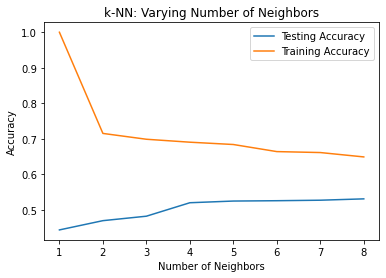

In [45]:
no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X1_train,y1_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X1_train, y1_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X1_test, y1_test)

# Visualization of k values vs accuracy

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()